In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
conn = engine.connect()
data = pd.read_sql("select * from measurement", conn)
first_measurement_data =session.query(Measurement).first()
first_measurement_data.__dict__



{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fcf0e4e4310>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [22]:
# Display the row's columns and data in dictionary format (Station)
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fcf103aad00>,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [23]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Text(0.5, 1.0, 'Precipitation over the Span of One Year')

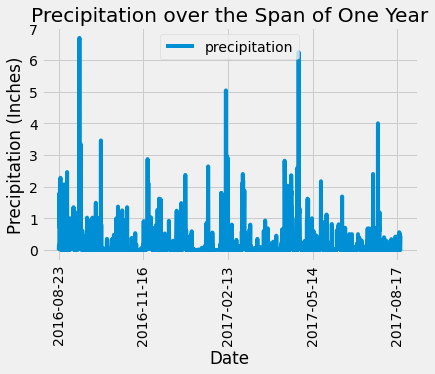

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).filter(Measurement.date>="2016-08-23").order_by(Measurement.date).all() #a year before 2016 of same date
# Calculate the date one year from the last date in data set.
# last_year = dt.date(2017,8,23)-dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores

result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column and Sort the dataframe by date

precipitation_df = pd.DataFrame(result, columns = ["date", "prcp"])
precipitation_df = precipitation_df.rename(columns={"prcp": "precipitation"})
precipitation_df = precipitation_df.set_index('date').sort_values(by="date")
precipitation_df = precipitation_df.dropna()
# precipitation_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot = 90)
plt.ylabel("Precipitation (Inches)")
plt.xlabel("Date")
plt.legend(loc= 'upper center')
plt.title('Precipitation over the Span of One Year')

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset
station_data = session.query(Station.station).count()
print(f'There are: {station_data} stations')

There are: 9 stations


In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()

[(85.0, 54.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency in Days')

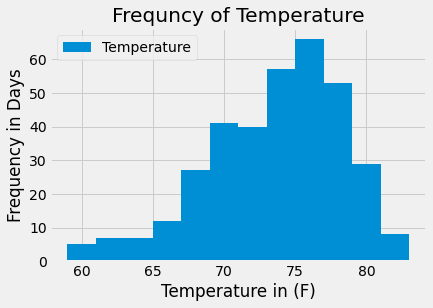

In [54]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281").filter(Measurement.date >= last_year).all()
active_df = pd.DataFrame(result, columns= ['temp'])
active_df=active_df.rename(columns={'temp':'Temperature'})
active_df.plot.hist(bins = 12)

#labels needed
plt.title("Frequncy of Temperature")
plt.xlabel('Temperature in (F)')
plt.ylabel('Frequency in Days')

# Close session

In [ ]:
# Close Session
session.close()